In [40]:
from tensorflow import keras
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import tensorflow.keras.utils as np_utils
from tensorflow.keras.models import Sequential,load_model
import keras.layers as layers
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

In [26]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [27]:
x_train.shape

(50000, 32, 32, 3)

In [28]:
y_train.shape

(50000, 1)

In [29]:
y_train[0]

array([6], dtype=uint8)

In [30]:
num_class = y_test.shape[1]
num_class

1

array([4], dtype=uint8)

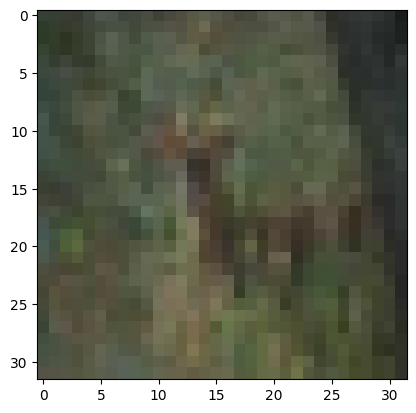

In [31]:
plt.imshow(x_train[10])
y_train[10]

In [32]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [33]:
# One-hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [34]:
y_train[10]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [35]:
model = Sequential([
    layers.Conv2D(32,(3,3), padding='same', input_shape=x_train.shape[1:] , activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(128, (3,3), padding='same',  activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2)
])
model.add(Dense(num_class, activation = 'softmax'))

NameError: name 'Dense' is not defined

In [97]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [98]:
model.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [95]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=64)


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 42ms/step - accuracy: 0.3069 - loss: 1.8686 - val_accuracy: 0.5333 - val_loss: 1.3009
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5197 - loss: 1.3388 - val_accuracy: 0.6240 - val_loss: 1.0866
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.5900 - loss: 1.1518 - val_accuracy: 0.6551 - val_loss: 0.9882
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.6313 - loss: 1.0363 - val_accuracy: 0.6786 - val_loss: 0.9269
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.6608 - loss: 0.9562 - val_accuracy: 0.7121 - val_loss: 0.8345
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.6794 - loss: 0.9049 - val_accuracy: 0.7092 - val_loss: 0.8464
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7011 - loss: 0.8505 - val_accuracy: 0.7271 - val_loss: 0.7749
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.7159 - loss: 0.8097 - 

<Axes: >

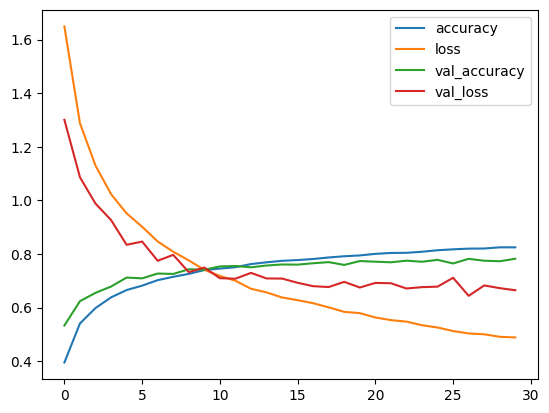

In [99]:
pd.DataFrame(history.history).plot()


In [103]:
model.save('CNN.h5')

In [3]:
model2=load_model('CNN.h5')

In [23]:
model2.predict(x_test[10:])[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([0.10002846, 0.09999261, 0.10003541, 0.1000052 , 0.10001852,
       0.1000287 , 0.09999502, 0.09993038, 0.09999108, 0.09997465],
      dtype=float32)

In [41]:

# Predicting test data
predictions = model.predict(x_test)

predictions = np.argmax(predictions, axis = 1)

#y_test = np.argmax(y_test, axis = 1)


# Creating confusion matrix
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets